<a href="https://www.kaggle.com/code/shayanb2004/microfinance-notebook?scriptVersionId=144007553" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In this notebook we will analyze the specific dataset which has been provided in kaggle in order to predict if a person will have late payment on their loans or not.

Since this is a data science problem, we will try and use some solutions which are related to this kind of problem.

The dataset has provided us with different tables, but since the only the train and test tables are a like, we will only use our analysis on the train table so that we can use it on test data too.

we will use kaggle to load the dataset.

This notebook tries to explain the complete data science problem documentation using the __CRISP-DM__

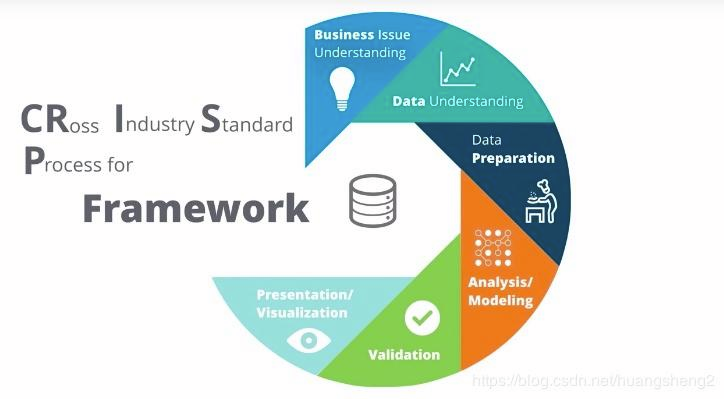

In a nutshell this methodology consists of the below steps:

    1.Business Understanding

    2.Data Understanding

    3.Data Preparation

    4.Modeling

    5.Evaluation

    6.Deployment

# 1.Business Understanding

This dataset belongs to micro finance industry. This industry is a subset of fintech industry and has enabled persons and businesses to take small loans.

Microfinance is a key segment of the world of finance, especially with respect to data science and trading companies. It is a business of providing small loans, savings, and financial services to the people and firms who have limited access to formal banking. The domain of microfinance is one of the most interesting areas to analyze and invest for your specialized competence in data science and finance. Data science can give credit scoring and risk management insights using which microfinance portfolios can be assessed and managed, and this is an integral part of financial services for the under-served. Involving a data scientist in both data science and the trading industry has its clear advantages. A better understanding of the dynamics of microfinance can be of use in identifying further investment opportunities and their impact on the financial market.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
from IPython.display import clear_output
import gc

import matplotlib.pyplot as plt
import seaborn as sns

#STATS
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")
clear_output()

In [ ]:
train_df = pd.read_csv("/kaggle/input/loan-dataset/application_train.csv")
train_cols = train_df.columns
display(train_df.info(show_counts=True))

# AMT_INCOME_TOTAL = Income of the client
# AMT_CREDIT = Credit amount of the loan
# AMT_ANNUITY = Loan annuity
# AMT_GOODS_PRICE = For consumer loans it is the price of the goods for which the loan is given
# NAME_TYPE_SUITE = Who was accompanying client when he was applying for the loan
# NAME_INCOME_TYPE = Clients income type (businessman, working, maternity leave)
# NAME_EDUCATION_TYPE = Level of highest education the client achieved
# NAME_FAMILY_STATUS = Family status of the client
# NAME_HOUSING_TYPE = What is the housing situation of the client (renting, living with parents, ...)
# REGION_POPULATION_RELATIVE = Normalized population of region where client lives (higher number means the client lives in more pop...
# DAYS_BIRTH = Client's age in days at the time of application
# DAYS_EMPLOYED = How many days before the application the person started current employment
# DAYS_REGISTRATION = How many days before the application did client change his registration
# DAYS_ID_PUBLISH = How many days before the application did client change the identity document with which he applied f...
# OWN_CAR_AGE = Age of client's car
# FLAG_MOBIL = Did client provide mobile phone (1=YES, 0=NO)
# FLAG_EMP_PHONE = Did client provide work phone (1=YES, 0=NO)
# FLAG_WORK_PHONE = Did client provide home phone (1=YES, 0=NO)
# FLAG_CONT_MOBILE = Was mobile phone reachable (1=YES, 0=NO)
# FLAG_PHONE = Did client provide home phone (1=YES, 0=NO)
# FLAG_EMAIL = Did client provide email (1=YES, 0=NO)
# OCCUPATION_TYPE = What kind of occupation does the client have
# CNT_FAM_MEMBERS = How many family members does client have
# REGION_RATING_CLIENT = Our rating of the region where client lives (1,2,3)
# REGION_RATING_CLIENT_W_CITY = Our rating of the region where client lives with taking city into account (1,2,3)
# WEEKDAY_APPR_PROCESS_START = On which day of the week did the client apply for the loan
# HOUR_APPR_PROCESS_START = Approximately at what hour did the client apply for the loan
# REG_REGION_NOT_LIVE_REGION = Flag if client's permanent address does not match contact address (1=different, 0=same, at region le...
# REG_REGION_NOT_WORK_REGION = Flag if client's permanent address does not match work address (1=different, 0=same, at region level...
# LIVE_REGION_NOT_WORK_REGION = Flag if client's contact address does not match work address (1=different, 0=same, at region level)
# REG_CITY_NOT_LIVE_CITY = Flag if client's permanent address does not match contact address (1=different, 0=same, at city leve...
# REG_CITY_NOT_WORK_CITY = Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
# LIVE_CITY_NOT_WORK_CITY = Flag if client's contact address does not match work address (1=different, 0=same, at city level)
# ORGANIZATION_TYPE = Type of organization where client works
# EXT_SOURCE_1 = Normalized score from external data source
# EXT_SOURCE_2 = Normalized score from external data source
# EXT_SOURCE_3 = Normalized score from external data source
# APARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# BASEMENTAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# YEARS_BEGINEXPLUATATION_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# YEARS_BUILD_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# COMMONAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# ELEVATORS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# ENTRANCES_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# FLOORSMAX_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# FLOORSMIN_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LANDAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LIVINGAPARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LIVINGAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# NONLIVINGAPARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# NONLIVINGAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...



In [ ]:
train_df = ChangeType(train_df, "int64", "int32")
train_df = ChangeType(train_df, "float64", "float32")
gc.collect()

In [ ]:
def ChangeType(df, org_type, target_type):
#     display(df.select_dtypes(org_type).describe())
    float_cols = df.select_dtypes(org_type).columns
    df.loc[:,float_cols] = df.loc[:,float_cols].astype(target_type)
#     display(df.select_dtypes(target_type).describe())
#     print(df.info(memory_usage="deep"))
    
    return df

In [ ]:
nonan_cols = (
    train_df
    .isna()
    .sum(axis=0)
    /train_df.shape[0]
    *100 <= 30
)
display(train_df.loc[:,nonan_cols])
nan_cols = nonan_cols[(nonan_cols == False)].index.to_list()

# EDA

## APPLICATION

In [ ]:
tmp_df = train_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_TYPE_SUITE"]]

In [ ]:
na_df = tmp_df[(tmp_df["NAME_TYPE_SUITE"].isna())]
display(na_df)

In [ ]:
sns.pairplot(data=na_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]])
plt.show()
#ANNUITY HAS A LINEAR RELATIONSHIP WITH CREDIT

In [ ]:
# Assuming tmp_df is your DataFrame
# Calculate the ratio of AMT_CREDIT to AMT_INCOME_TOTAL and convert to percentage
credit_income_ratio = pd.DataFrame()
credit_income_ratio["CI"] = (tmp_df["AMT_CREDIT"] / tmp_df["AMT_INCOME_TOTAL"]) * 100
# Create a bar plot for the value counts of the ratio
credit_income_ratio["AI"] = (tmp_df["AMT_ANNUITY"] / tmp_df["AMT_INCOME_TOTAL"]) * 100
credit_income_ratio.info(show_counts=True)
(credit_income_ratio["AI"].isna())
# Display the plot
# plt.title("Credit-Income Ratio")
# plt.xlabel("Credit-Income Ratio (%)")
# plt.ylabel("Count")
# plt.show()

## FEATURE ENGINEERING

### TRAIN DATAFRAME

In [ ]:
def factorize_col(df, col_name):
    cat = pd.Categorical(df[col_name])
    factorize_array, factorize_uniques = pd.factorize(cat)
    df[col_name] = factorize_array
    
    return df, factorize_uniques, cat

In [ ]:
def onehot_conv(df, col_name):
    encoder = OneHotEncoder(handle_unknown="infrequent_if_exist")
    simp_imp = SimpleImputer(strategy="most_frequent")
    array = simp_imp.fit_transform(df[col_name].to_numpy()[...,np.newaxis]).ravel()
    unique_cols = np.unique(array)
    oneh_names = [f"{col_name}_{u}" for u in unique_cols]
    df[oneh_names] = encoder.fit_transform(array.reshape(-1,1)).toarray().astype(np.int8)
    
    return df, encoder

In [ ]:
flag_cols = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
train_df["FLAG_CONTACT"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [ ]:
flag_cols = [f"FLAG_DOCUMENT_{i}" for i in range(2,22)]
train_df["FLAG_DOCUMENT"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [ ]:
flag_cols = ["REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY",
"LIVE_CITY_NOT_WORK_CITY"]
train_df["FLAG_NOTMATCH"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [ ]:
factor_cols = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "EMERGENCYSTATE_MODE",
    "FLAG_OWN_REALTY",
    "FLAG_OWN_CAR"
]
factor_objects = {}
# train_df, emergency_unique, emergency_cat = factorize_col(train_df, col_name="EMERGENCYSTATE_MODE")
for col_name in factor_cols:
    factor_objects[col_name] = {"unique_value": None,"categories": None} 
    train_df, unique_vals, category_vals = factorize_col(train_df, col_name=col_name)
    factor_objects[col_name]["unique_value"] = unique_vals
    factor_objects[col_name]["categories"] = category_vals

# print(factor_objects)

In [ ]:
org_counts = train_df["ORGANIZATION_TYPE"].value_counts(normalize=True)
replace_org_list = org_counts[(org_counts<=0.01)].index.to_list()
train_df["ORGANIZATION_TYPE"] = train_df["ORGANIZATION_TYPE"].replace(replace_org_list, "Other")

In [ ]:
org_counts = train_df["OCCUPATION_TYPE"].value_counts(normalize=True)
replace_occ_list = org_counts[(org_counts<=0.01)].index.to_list()
train_df["OCCUPATION_TYPE"] = train_df["OCCUPATION_TYPE"].replace(replace_occ_list, "Other")

In [ ]:
categorical_cols = [
    "WALLSMATERIAL_MODE",
    "HOUSETYPE_MODE",
    "FONDKAPREMONT_MODE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE"
]
oneh_objects ={} 
for col_name in categorical_cols:
    train_df, oneh_objects[col_name] = onehot_conv(train_df, col_name=col_name)
    train_df = train_df.drop(columns=[col_name])
    
print(oneh_objects)

In [ ]:
house_cols = [
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "TOTALAREA_MODE",
    "EMERGENCYSTATE_MODE"
]

This step Might take some time

In [ ]:
avg_imputer = IterativeImputer(max_iter=20)
imput_array = avg_imputer.fit_transform(train_df[house_cols].to_numpy())

std_scaler = StandardScaler()
std_avg_cols = std_scaler.fit_transform(imput_array)

pca_avg = PCA()
pca_avg.fit(std_avg_cols)
var_ratio = np.cumsum(pca_avg.explained_variance_ratio_)
pca_components = var_ratio[(var_ratio<=0.95)].shape[0]

pca_avg = PCA(n_components=pca_components)
pca_col_names = [f"PCA_{i}" for i in range(pca_components)]
train_df[pca_col_names] = pca_avg.fit_transform(std_avg_cols)
train_df = train_df.drop(columns=house_cols)

In [ ]:
day_mapping = {
    'MONDAY': 1,
    'TUESDAY': 2,
    'WEDNESDAY': 3,
    'THURSDAY': 4,
    'FRIDAY': 5,
    'SATURDAY': 6,
    'SUNDAY': 7
}
train_df["WEEKDAY_APPR_PROCESS_START"] = train_df["WEEKDAY_APPR_PROCESS_START"].map(day_mapping)

In [ ]:
# Handle NA values for those who have cars
na_idx = train_df[(train_df["FLAG_OWN_CAR"]==1) & (train_df["OWN_CAR_AGE"].isna())].index
train_df.loc[na_idx, "OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].mean(skipna=True)

#handle NA values for those who doesn't have a car
train_df["OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].add(1).pow(-1)
train_df["OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].fillna(value=0)
train_df["CAR_STATUS"] = train_df["OWN_CAR_AGE"]*train_df["FLAG_OWN_CAR"]
train_df = train_df.drop(columns=["FLAG_OWN_CAR"])

In [ ]:
train_df["REGION_RATING_CLIENT"] = train_df[["REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]].sum(axis=1)
train_df = train_df.drop(columns=["REGION_RATING_CLIENT_W_CITY"])

In [ ]:
vif_df = train_df.select_dtypes("int")
vif_df = pd.concat([vif_df, train_df.select_dtypes("float")], axis=1)
vif_df.info()

In [ ]:
vif_df = train_df.select_dtypes("int")
vif_df = pd.concat([vif_df, train_df.select_dtypes("float")], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]

In [ ]:
vif_data.sort_values(by="VIF", ascending=False)

## BUREAU TEST

In [ ]:
bur_df = pd.read_csv("/kaggle/input/loan-dataset/POS_CASH_balance.csv")
bur_id = bur_df["SK_ID_CURR"].unique()
print(bur_id.shape)

In [ ]:
train_id = train_df["SK_ID_CURR"]
print(train_id.shape)

In [ ]:
test_df = pd.read_csv("/kaggle/input/loan-dataset/application_test.csv")
test_id = test_df["SK_ID_CURR"]
print(test_id.shape)

In [ ]:
share_id = [id for id in bur_id if id in test_id]
print(len(share_id))

In [ ]:
train_cols = pd.read_csv("/kaggle/input/loan-dataset/application_train.csv").columns
test_cols = test_df.columns
print([col for col in test_cols if col not in train_cols])

In [ ]:
train_cols

# DATA MANIPULATION

in this step I should check to see if I can get any information about the customers in both train and test dataset fro other data files such as bureau, etc.

In [ ]:
merge_df = pd.merge(train_df, credit_df, on="SK_ID_CURR", how="inner")

In [ ]:
def DelNas(df):
    print(df.shape)
    nona_cols = (
        df
        .isna()
        .sum()
        /df.shape[0]*100 <= 30
    )
    df = df.loc[:, nona_cols]
    print(df.shape)
    
    return df

merge_df = DelNas(merge_df)
poscash_df = DelNas(poscash_df)